# Imports

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import keras
import matplotlib.pyplot as plt
from pathlib import Path

Using TensorFlow backend.


## Import Data

In [2]:
data_train = pd.read_csv('../data/trump/train_rounds_filtered_merged.csv', header=None)
data_test = pd.read_csv('../data/trump/test_rounds_filtered_merged.csv', header=None)

cards = [
# Diamonds
'DA','DK','DQ','DJ','D10','D9','D8','D7','D6',
# Hearts
'HA','HK','HQ','HJ','H10','H9','H8','H7','H6',
# Spades
'SA','SK','SQ','SJ','S10','S9','S8','S7','S6',
# Clubs
'CA','CK','CQ','CJ','C10','C9','C8','C7','C6'
]

trump = ['trump']

In [3]:
# data_train
data_train.columns = cards + trump
data_train.head()

,DA,DK,DQ,DJ,D10,D9,D8,D7,D6,HA,...,CA,CK,CQ,CJ,C10,C9,C8,C7,C6,trump
0,0,1,0,0,0,1,1,0,1,0,...,0,0,0,0,1,0,0,0,0,5
1,0,0,0,1,1,0,0,0,1,0,...,1,1,0,1,0,0,0,0,0,6
2,1,0,0,0,0,0,1,0,1,1,...,0,0,1,0,0,0,0,0,0,1
3,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,1,1,0,6
4,1,1,1,1,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,4


In [4]:
# data_test
data_test.columns = cards + trump
data_test.head()

,DA,DK,DQ,DJ,D10,D9,D8,D7,D6,HA,...,CA,CK,CQ,CJ,C10,C9,C8,C7,C6,trump
0,0,0,1,1,0,0,1,0,0,1,...,0,1,0,0,1,0,0,0,0,6
1,0,0,0,0,0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,0,2
2,0,1,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,6
3,1,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,5
4,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,1,0,6


add data column with NrD, NrH, NrS, NrC, NrA, Nr6

In [5]:
# data_train
data_train.insert(loc=len(data_train.columns), column='NrD', value=data_train.iloc[:,0:9].sum(axis=1) / 9.0)
data_train.insert(loc=len(data_train.columns), column='NrH', value=data_train.iloc[:,9:18].sum(axis=1) / 9.0)
data_train.insert(loc=len(data_train.columns), column='NrS', value=data_train.iloc[:,18:27].sum(axis=1) / 9.0)
data_train.insert(loc=len(data_train.columns), column='NrC', value=data_train.iloc[:,27:36].sum(axis=1) / 9.0)

data_train.insert(loc=len(data_train.columns), column='NrA', value=data_train.iloc[:,0:36:9].sum(axis=1) / 4.0)
data_train.insert(loc=len(data_train.columns), column='Nr6', value=data_train.iloc[:,8:36:9].sum(axis=1) / 4.0)
data_train.head()

,DA,DK,DQ,DJ,D10,D9,D8,D7,D6,HA,...,C8,C7,C6,trump,NrD,NrH,NrS,NrC,NrA,Nr6
0,0,1,0,0,0,1,1,0,1,0,...,0,0,0,5,0.444444,0.222222,0.222222,0.111111,0.00,0.50
1,0,0,0,1,1,0,0,0,1,0,...,0,0,0,6,0.333333,0.111111,0.222222,0.333333,0.25,0.50
2,1,0,0,0,0,0,1,0,1,1,...,0,0,0,1,0.333333,0.444444,0.111111,0.111111,0.50,0.50
3,1,0,0,0,1,0,0,0,0,0,...,1,1,0,6,0.222222,0.333333,0.000000,0.444444,0.50,0.25
4,1,1,1,1,0,0,1,1,0,0,...,1,0,0,4,0.666667,0.111111,0.111111,0.111111,0.25,0.25


In [6]:
# data_test
data_test.insert(loc=len(data_test.columns), column='NrD', value=data_test.iloc[:,0:9].sum(axis=1) / 9.0)
data_test.insert(loc=len(data_test.columns), column='NrH', value=data_test.iloc[:,9:18].sum(axis=1) / 9.0)
data_test.insert(loc=len(data_test.columns), column='NrS', value=data_test.iloc[:,18:27].sum(axis=1) / 9.0)
data_test.insert(loc=len(data_test.columns), column='NrC', value=data_test.iloc[:,27:36].sum(axis=1) / 9.0)

data_test.insert(loc=len(data_test.columns), column='NrA', value=data_test.iloc[:,0:36:9].sum(axis=1) / 4.0)
data_test.insert(loc=len(data_test.columns), column='Nr6', value=data_test.iloc[:,8:36:9].sum(axis=1) / 4.0)
data_test.head()

,DA,DK,DQ,DJ,D10,D9,D8,D7,D6,HA,...,C8,C7,C6,trump,NrD,NrH,NrS,NrC,NrA,Nr6
0,0,0,1,1,0,0,1,0,0,1,...,0,0,0,6,0.333333,0.333333,0.111111,0.222222,0.25,0.0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,2,0.111111,0.222222,0.333333,0.333333,0.25,0.0
2,0,1,0,0,1,1,0,0,0,0,...,1,0,0,6,0.333333,0.111111,0.333333,0.222222,0.00,0.0
3,1,0,0,0,0,0,1,1,1,0,...,0,0,0,5,0.444444,0.333333,0.222222,0.000000,0.25,0.5
4,0,0,0,0,0,1,0,0,0,0,...,1,1,0,6,0.111111,0.222222,0.333333,0.333333,0.00,0.0


In [7]:
# x_train = data_train.filter(items=['DJ', 'D9', 'HJ', 'H9', 'SJ', 'S9', 'CJ', 'C9', 'NrD', 'NrH', 'NrS', 'NrC', 'NrA', 'Nr6']) 
x_train = data_train.drop('trump', axis='columns', inplace=False)
# x_train = data_train
x_train.head()

,DA,DK,DQ,DJ,D10,D9,D8,D7,D6,HA,...,C9,C8,C7,C6,NrD,NrH,NrS,NrC,NrA,Nr6
0,0,1,0,0,0,1,1,0,1,0,...,0,0,0,0,0.444444,0.222222,0.222222,0.111111,0.00,0.50
1,0,0,0,1,1,0,0,0,1,0,...,0,0,0,0,0.333333,0.111111,0.222222,0.333333,0.25,0.50
2,1,0,0,0,0,0,1,0,1,1,...,0,0,0,0,0.333333,0.444444,0.111111,0.111111,0.50,0.50
3,1,0,0,0,1,0,0,0,0,0,...,0,1,1,0,0.222222,0.333333,0.000000,0.444444,0.50,0.25
4,1,1,1,1,0,0,1,1,0,0,...,0,1,0,0,0.666667,0.111111,0.111111,0.111111,0.25,0.25


In [8]:
# x_test = data_test.filter(items=['DJ', 'D9', 'HJ', 'H9', 'SJ', 'S9', 'CJ', 'C9', 'NrD', 'NrH', 'NrS', 'NrC', 'NrA', 'Nr6']) 
x_test = data_test.drop('trump', axis='columns', inplace=False)
# x_test = data_test
x_test.head()

,DA,DK,DQ,DJ,D10,D9,D8,D7,D6,HA,...,C9,C8,C7,C6,NrD,NrH,NrS,NrC,NrA,Nr6
0,0,0,1,1,0,0,1,0,0,1,...,0,0,0,0,0.333333,0.333333,0.111111,0.222222,0.25,0.0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0.111111,0.222222,0.333333,0.333333,0.25,0.0
2,0,1,0,0,1,1,0,0,0,0,...,0,1,0,0,0.333333,0.111111,0.333333,0.222222,0.00,0.0
3,1,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0.444444,0.333333,0.222222,0.000000,0.25,0.5
4,0,0,0,0,0,1,0,0,0,0,...,0,1,1,0,0.111111,0.222222,0.333333,0.333333,0.00,0.0


In [9]:
y_train_label = data_train['trump']
y_train = keras.utils.to_categorical(y_train_label, num_classes=7)

model = keras.Sequential()
model.add(keras.layers.Dense(42, activation='relu', input_shape=[42]))
model.add(keras.layers.Dense(42, activation='relu'))
model.add(keras.layers.Dense(42, activation='relu'))
model.add(keras.layers.Dense(42, activation='relu'))
model.add(keras.layers.Dense(42, activation='relu'))
model.add(keras.layers.Dense(42, activation='relu'))
model.add(keras.layers.Dense(42, activation='relu'))
model.add(keras.layers.Dense(42, activation='relu'))
model.add(keras.layers.Dense(42, activation='relu'))
model.add(keras.layers.Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=100, batch_size=1000, shuffle=True)

Epoch 1/100
313160/313160 [==============================] - 1s 4us/step - loss: 1.8118 - accuracy: 0.3779
Epoch 2/100
313160/313160 [==============================] - 1s 4us/step - loss: 1.7595 - accuracy: 0.3857
Epoch 3/100
313160/313160 [==============================] - 1s 4us/step - loss: 1.7573 - accuracy: 0.3857
Epoch 4/100
313160/313160 [==============================] - 1s 3us/step - loss: 1.7549 - accuracy: 0.3857
Epoch 5/100
313160/313160 [==============================] - 1s 4us/step - loss: 1.7508 - accuracy: 0.3857
Epoch 6/100
313160/313160 [==============================] - 1s 4us/step - loss: 1.7423 - accuracy: 0.3857
Epoch 7/100
313160/313160 [==============================] - 1s 4us/step - loss: 1.7196 - accuracy: 0.3857
Epoch 8/100
313160/313160 [==============================] - 1s 4us/step - loss: 1.6536 - accuracy: 0.3936
Epoch 9/100
313160/313160 [==============================] - 1s 3us/step - loss: 1.5640 - accuracy: 0.4272
Epoch 10/100
313160/313160 [=========

313160/313160 [==============================] - 1s 4us/step - loss: 0.8479 - accuracy: 0.6292
Epoch 77/100
313160/313160 [==============================] - 1s 4us/step - loss: 0.8472 - accuracy: 0.6296
Epoch 78/100
313160/313160 [==============================] - 1s 4us/step - loss: 0.8472 - accuracy: 0.6294
Epoch 79/100
313160/313160 [==============================] - 1s 4us/step - loss: 0.8458 - accuracy: 0.6302
Epoch 80/100
313160/313160 [==============================] - 1s 4us/step - loss: 0.8461 - accuracy: 0.6301
Epoch 81/100
313160/313160 [==============================] - 1s 4us/step - loss: 0.8442 - accuracy: 0.6308
Epoch 82/100
313160/313160 [==============================] - 1s 4us/step - loss: 0.8439 - accuracy: 0.6310
Epoch 83/100
313160/313160 [==============================] - 1s 3us/step - loss: 0.8437 - accuracy: 0.6311
Epoch 84/100
313160/313160 [==============================] - 1s 4us/step - loss: 0.8418 - accuracy: 0.6317
Epoch 85/100
313160/313160 [=============

In [10]:
model.summary()
print(model.get_weights())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 42)                1806      
_________________________________________________________________
dense_2 (Dense)              (None, 42)                1806      
_________________________________________________________________
dense_3 (Dense)              (None, 42)                1806      
_________________________________________________________________
dense_4 (Dense)              (None, 42)                1806      
_________________________________________________________________
dense_5 (Dense)              (None, 42)                1806      
_________________________________________________________________
dense_6 (Dense)              (None, 42)                1806      
_________________________________________________________________
dense_7 (Dense)              (None, 42)               

Text(0, 0.5, 'loss')

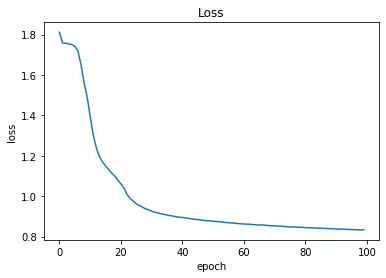

In [11]:
plt.plot(history.history['loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')

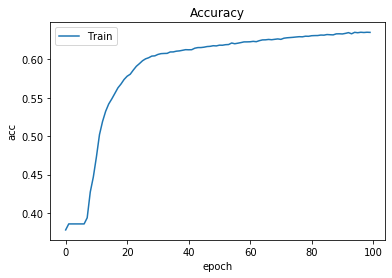

In [12]:
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['Train', 'Val'], loc='upper left')

In [13]:
history.history['accuracy'][-1]

0.6351705

# Predict

In [14]:
y_pred = model.predict(x_test)
# print(y_pred)

In [15]:
TOTAL_COUNT = len(x_test)
CORRECT_COUNT = 0

for i in range(0,len(y_pred)):
    global CORRECT_TRUMP
    
    predicted_trump = np.where(y_pred[i] == np.amax(y_pred[i]))[0][0]
    real_trump = data_test.iloc[i]['trump']
    
    #print(predicted_trump)
    #print(real_trump)
    
    if int(predicted_trump) == int(real_trump):
        CORRECT_COUNT = CORRECT_COUNT + 1

In [16]:
accuracy = (CORRECT_COUNT / TOTAL_COUNT) * 100
print(f'Total Count  : {TOTAL_COUNT}')
print(f'Correct Count: {CORRECT_COUNT}')
print(f'Accuracy     : {accuracy}')

Total Count  : 103794
Correct Count: 65593
Accuracy     : 63.19536774765401


### Versions

| Version | CSV | epoch | Batch size | Layers                    | Loss   | AccTrain | AccTest |
| ------- | --- | ----- | ---------- | ------------------------- | ------ | -------- | ------- |
| V0      | 1   | 100   | 2500       | 9 relu & 1 softmax        | 0.89   | 0.61     | 0.615   |
| V0      | 1   | 100   | 1000       | 9 relu & 1 softmax        | 0.8309 | 0.6365   | 0.6344  |